# 1

Расстояния между точками [0 0 0] и [2 0 1] :
1)Расстояние Евклида: 2.23606797749979
2)Квадрат Евклидова расстояния: 5.000000000000001
3)Расстояние Чебышева: 2.0
4)Расстояние Хеминга: 3.0
Расстояния между точками [0 0 0] и [3 3 3] :
1)Расстояние Евклида: 5.196152422706632
2)Квадрат Евклидова расстояния: 27.0
3)Расстояние Чебышева: 3.0
4)Расстояние Хеминга: 9.0
Расстояния между точками [0 0 0] и [1 3 2] :
1)Расстояние Евклида: 3.7416573867739413
2)Квадрат Евклидова расстояния: 14.0
3)Расстояние Чебышева: 3.0
4)Расстояние Хеминга: 6.0
Расстояния между точками [2 0 1] и [3 3 3] :
1)Расстояние Евклида: 3.7416573867739413
2)Квадрат Евклидова расстояния: 14.0
3)Расстояние Чебышева: 3.0
4)Расстояние Хеминга: 6.0
Расстояния между точками [2 0 1] и [1 3 2] :
1)Расстояние Евклида: 3.3166247903554
2)Квадрат Евклидова расстояния: 11.0
3)Расстояние Чебышева: 3.0
4)Расстояние Хеминга: 5.0
Расстояния между точками [3 3 3] и [1 3 2] :
1)Расстояние Евклида: 2.23606797749979
2)Квадрат Евклидова расстояни

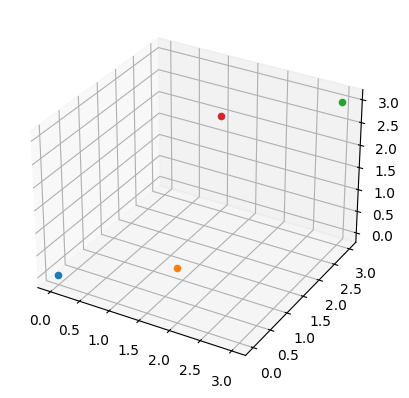

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

arr = np.array([[0,0,0], [2,0,1], [3,3,3], [1,3,2]])
for i in range(len(arr)):
    ax.scatter(arr[i][0], arr[i][1], arr[i][2])
    for j in range(i + 1, len(arr)):
        print("Расстояния между точками", arr[i], "и", arr[j],  ":")
        print("1)Расстояние Евклида:", np.linalg.norm(arr[i] - arr[j]))
        print("2)Квадрат Евклидова расстояния:", np.linalg.norm(arr[i] - arr[j]) ** 2)
        print("3)Расстояние Чебышева:", np.linalg.norm(arr[i] - arr[j], ord=np.inf))
        print("4)Расстояние Хеминга:", np.linalg.norm(arr[i] - arr[j], ord=1))

plt.show()


# 2

In [6]:
A = np.array([np.arange(0,5)] * 5)
print(A)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


# 3

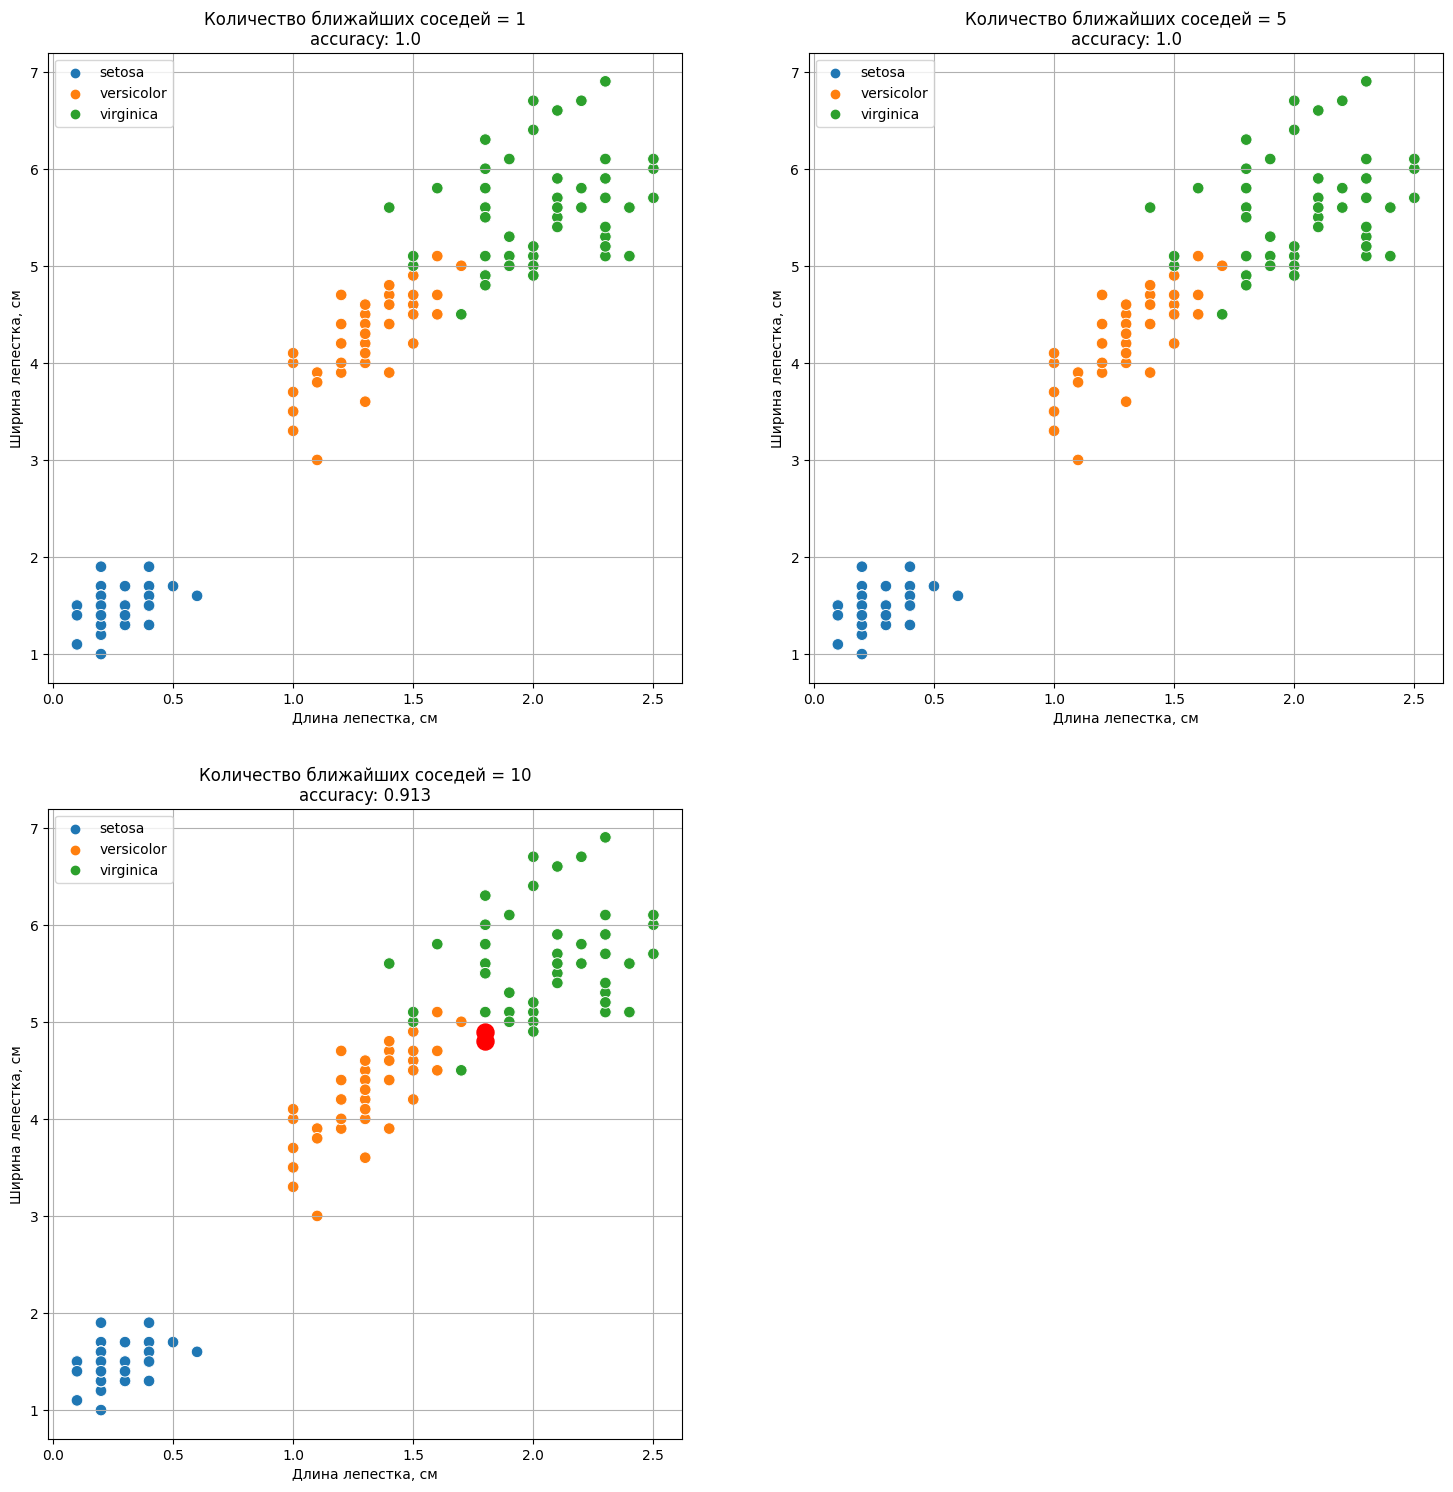

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

arr = [1, 5, 10]
plt.figure(figsize=(18,18))
for i in range(len(arr)):
    model = KNeighborsClassifier(n_neighbors = arr[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    plt.subplot(2,2,i + 1)
    sns.scatterplot(
        data = iris,
        x = 'petal_width', y = 'petal_length',
        hue = 'species',
        s = 70
    )
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc = 2)
    plt.grid()

    for j in range(len(y_test)):
        if np.array(y_test)[j] != y_pred[j]:
            plt.scatter(x_test.iloc[j, 3], x_test.iloc[j, 2], color = 'red', s = 150)

    plt.title("Количество ближайших соседей = " + str(arr[i]) + '\n' + f'accuracy: {accuracy_score(y_test, y_pred) :.3}')
